#### **Exercise 1**

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.  Try using different methods.  What works the best?

In [2]:
import pandas as pd
data = pd.read_csv("./data/sample_data_with_outliers.csv")
data


,Age,Income,Purchase
0,76,75071,1
1,88,62405,0
2,82,61914,1
3,81,66843,1
4,62,30492,0
...,...,...,...
195,61,60764,1
196,64,49855,1
197,46,24735,0
198,29,60864,1


<Axes: ylabel='Frequency'>

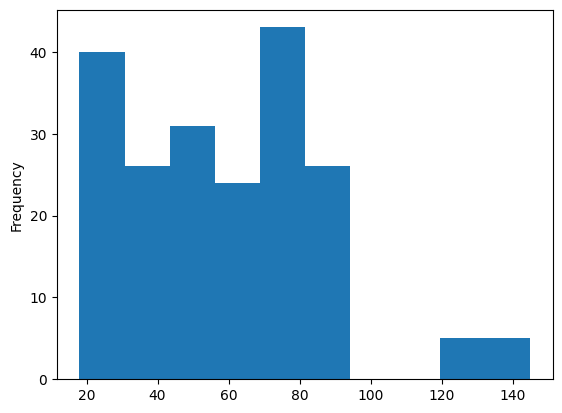

<Axes: ylabel='Frequency'>

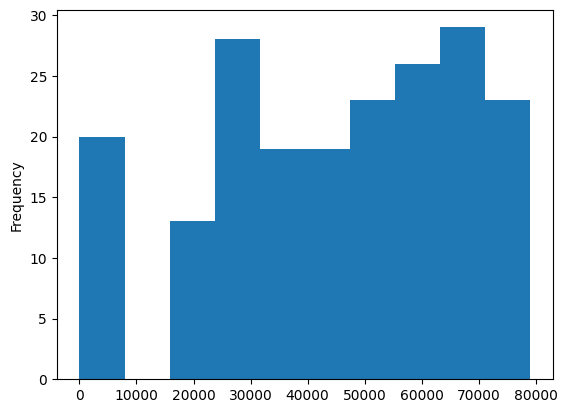

In [3]:
data["Income"].plot.hist()

<Axes: ylabel='Frequency'>

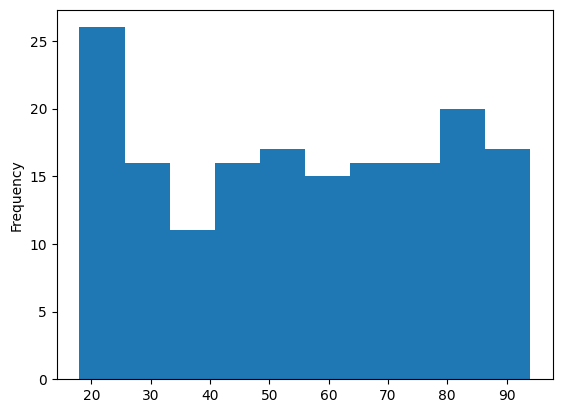

In [19]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.15)  # Assuming approximately 15% of data are outliers
outliers = iso_forest.fit_predict(data)

# Filter out the outliers
df_filtered = data[outliers == 1]
df_filtered["Age"].plot.hist()

<Axes: ylabel='Frequency'>

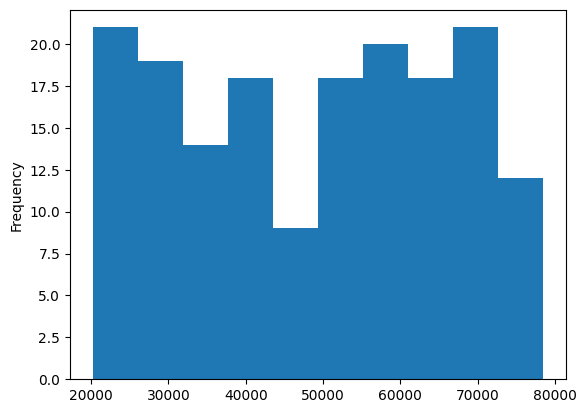

In [6]:
df_filtered["Income"].plot.hist()

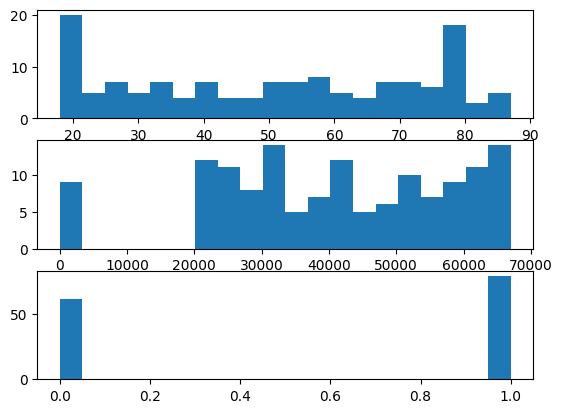

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore


fig,axes = plt.subplots(3)

# Calculate z-scores
z_scores = data.apply(zscore)

# Filter rows based on a z-score threshold
threshold =1
df_filtered = data[(z_scores < threshold).all(axis=1)]
for idx, column in enumerate(df_filtered.columns):
    axes[idx].hist(df_filtered[column],bins=20, label=column),
    #df_filtered.plot.hist(subplots=subplots,sharex=False)

#### **Exercise 2**

In the following, I've created a sample dataset with an exponential feature and a normal feature. Try using the different scaling methods before running the classifier.  How do your results change:

1.  If you scale the exponential feature using a StandardScaler
2.  If you scale the exponential feature using a Log transform

Logistic Regression without Scaling - Test Accuracy: 0.72


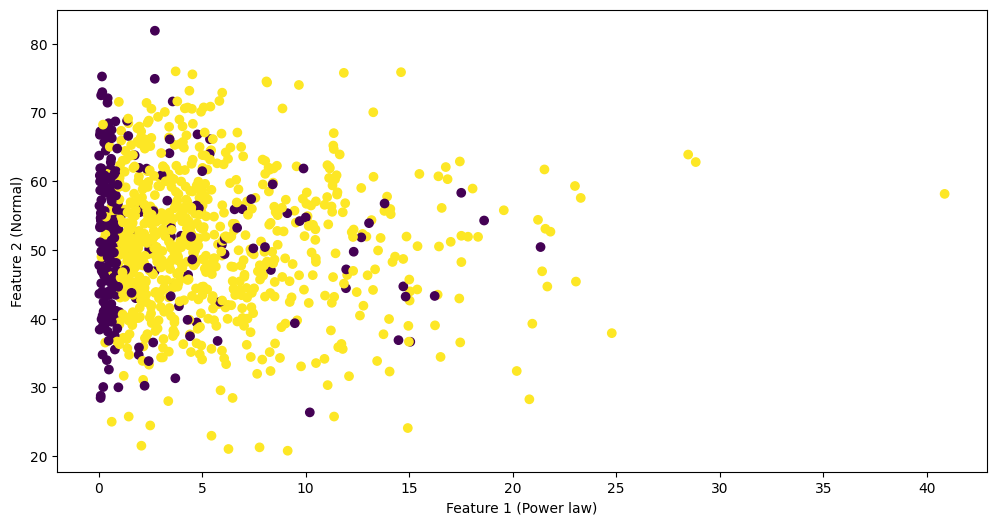

In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
pipeline = Pipeline([
    ("scalar",StandardScaler()),
    ("cls",LogisticRegression())
])


lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print(f"Logistic Regression without Scaling - Test Accuracy: {lr.score(X_test, y_test):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


(array([100., 128., 130., 152., 178., 133., 103.,  58.,  15.,   3.]),
 array([0.02294858, 0.39409211, 0.76523565, 1.13637919, 1.50752272,
        1.87866626, 2.24980979, 2.62095333, 2.99209687, 3.3632404 ,
        3.73438394]),
 <BarContainer object of 10 artists>)

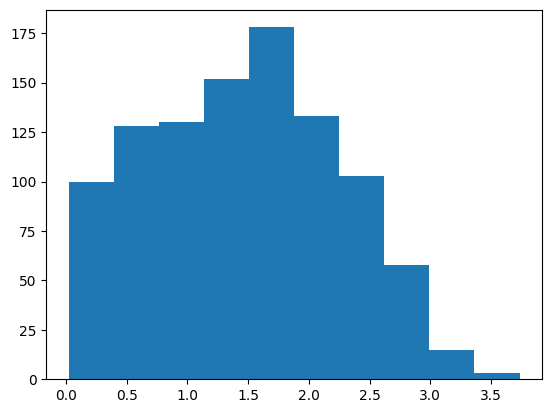

In [6]:
plt.hist(np.log(X[:,0]+1))

In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]



# Combine features into single data array
X = np.column_stack((X1, X2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
pipeline = Pipeline([
    ("scalar",StandardScaler()),
    ("cls",LogisticRegression())
])



#lr = LogisticRegression(max_iter=1000)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Logistic Regression with standard - Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# # Plot original features
# plt.figure(figsize=(12, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
# plt.xlabel('Feature 1 (Power law)')
# plt.ylabel('Feature 2 (Normal)')
# plt.show()


Logistic Regression with standard - Test Accuracy: 0.72


In [38]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic dataset
n_samples = 1000

# Feature 1: Power law (exponential) distribution
X1 = np.random.exponential(scale=5, size=n_samples)

# Feature 2: Normal distribution
X2 = np.random.normal(loc=50, scale=10, size=n_samples)

# Create labels: simple linear relation to X1 and X2
y = np.array([1 if x1 + 0.001 * x2 > 1 else 0 for x1, x2 in zip(X1, X2)])
flip_indices = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
y[flip_indices] = 1 - y[flip_indices]


# Combine features into single data array
X = np.column_stack((X1, X2))

#fx = FunctionTransformer(lambda x: np.log(x+1))

X[:,0] = np.log(X[:,0]+1)
X[:,0]

array([1.20786735, 2.77574668, 2.02600496, 1.71644537, 0.61417126,
       0.61409394, 0.26174395, 2.40298723, 1.72194676, 1.96798614,
       0.09893681, 2.91873175, 2.29577674, 0.78547023, 0.69484321,
       0.69965452, 1.03452474, 1.55173235, 1.34226027, 1.00104171,
       1.7460391 , 0.56028565, 1.00341387, 1.18826592, 1.39740082,
       2.16213612, 0.74843018, 1.52825948, 1.70247708, 0.21335116,
       1.73636393, 0.6600072 , 0.28991931, 2.76433217, 2.88218006,
       2.22588307, 1.03547343, 0.41468023, 1.91157803, 1.36109301,
       0.5012365 , 1.48562738, 0.16124143, 2.56511199, 0.9152057 ,
       1.86117343, 1.05352179, 1.5412778 , 1.60062297, 0.70405893,
       2.91582482, 2.13549419, 2.7097469 , 2.50640392, 1.7147474 ,
       2.62083349, 0.38067864, 0.73748625, 0.20815971, 1.08777391,
       1.24145685, 0.94887494, 2.28470513, 1.16506616, 0.97418757,
       1.5916884 , 0.56502441, 2.20854009, 0.3274166 , 3.12107474,
       2.12792438, 0.74559598, 0.02731075, 2.24596012, 1.96507

Logistic Regression with standard - Test Accuracy: 0.92


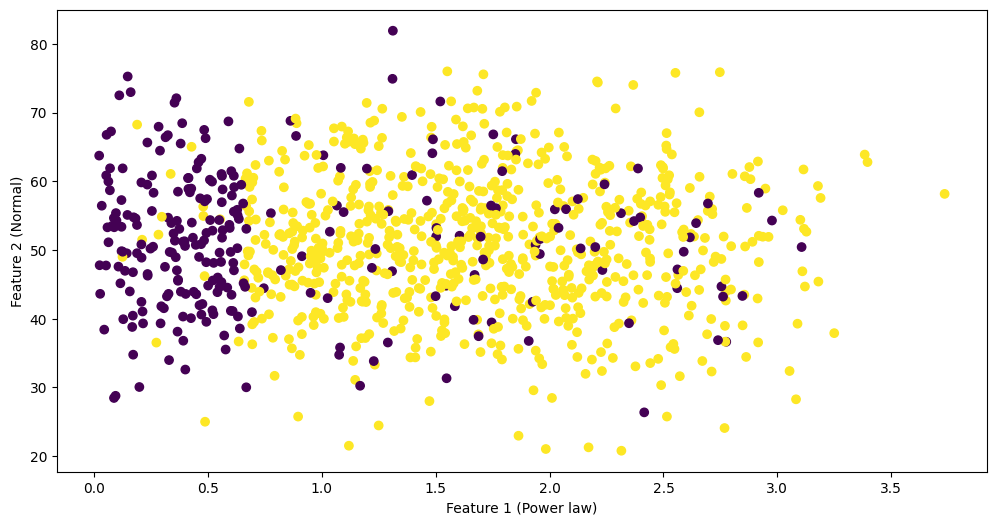

In [39]:


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
pipeline = Pipeline([
    ("scalar",StandardScaler()),
    ("cls",LogisticRegression())
])



#lr = LogisticRegression(max_iter=1000)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Logistic Regression with standard - Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Plot original features
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1 (Power law)')
plt.ylabel('Feature 2 (Normal)')
plt.show()


#### **Exercise 3**

The **Titanic dataset** (link to the data from [last week](../2-week2//data/titanic.csv)) contains the passenger list for all 768 passengers on the Titanic, as well as who survived. In this exercise, try using different methods for dealing with the nulls in the "age" column, and running the same classifier for the different methods (you might try a DecisionTreeClassifier, or a LogisticRegression classifier, or a SGDClassifier).  Which one gives the best result?  Why do you think that is?  Please only use the following columns for modeling: pclass, sex, age, sibsp, parch.  Be sure to try the following methods:

1. Fill forward, using 'ffill' in Pandas
2. Use a "mean" with a SimpleImputer
3. Use a "most_frequent" with a simple imputer
4. Use a KNN imputer from sklearn

In [9]:
data = pd.read_csv("../2-week2/data/titanic.csv")
data_cleaned = data[['pclass','sex','age','sibsp','parch','survived']]
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   object 
 2   age       1046 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   survived  1309 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 61.5+ KB


In [16]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
# ffill

data_ffill = data_cleaned.ffill()

def test(data,imputer):
    y = data['survived']
    X = data.drop("survived",axis=1)
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    tx = make_column_transformer((OrdinalEncoder(),['sex']))
    #imputer = SimpleImputer(strategy="median")
    pipeline = make_pipeline(tx,imputer,LogisticRegression())
    pipeline.fit(X_train,y_train)
    y_pred = pipeline.predict(X_test)
    return accuracy_score(y_test,y_pred)

test(data_ffill,KNNImputer())


0.8140243902439024

#### **Exercise 4**

Use the one-hot encoding method introduced in [](4-encoding.ipynb) for encoding multiple columns to one-hot encode the following data. 

In [20]:
from sklearn.preprocessing import OneHotEncoder

sample = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'red', 'blue', 'green'],
    'target': ['apple', 'sky', 'grass', 'sky', 'moon', 'apple'],
    'yumminess': [10,2,3,1,6,9]
})


tx  = make_column_transformer((OneHotEncoder(sparse=False,drop="first"),['color','target']))

result = tx.fit_transform(sample)
print(result)
df = pd.DataFrame(result,columns=tx.get_feature_names_out())
df['yumminess'] = sample.yumminess
df

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,onehotencoder__color_green,onehotencoder__color_red,onehotencoder__target_grass,onehotencoder__target_moon,onehotencoder__target_sky,yumminess
0,0.0,1.0,0.0,0.0,0.0,10
1,0.0,0.0,0.0,0.0,1.0,2
2,1.0,0.0,1.0,0.0,0.0,3
3,0.0,1.0,0.0,0.0,1.0,1
4,0.0,0.0,0.0,1.0,0.0,6
5,1.0,0.0,0.0,0.0,0.0,9


In [56]:
!pip install fancyimpute

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 5.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 42.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.0/334.0 kB 7.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 6.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 47.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN
import pandas as pd
import numpy as np

class CategoricalKNNImputer(BaseEstimator, TransformerMixin):
    def __init__(self, include_numeric=False, include_cols = []):
        self.encoders = {}
        self.knn_imputer = KNN()
        self.include_numeric = include_numeric
        self.include_cols = include_cols
    
    def fit(self, X, y=None):
        X = X.copy()
        
        if self.include_numeric:
            self.cols = X.columns.tolist()
        else:
            self.cols = X.select_dtypes(include=['object', 'category']).columns.tolist()+self.include_cols
            
        for col in self.cols:
            le = LabelEncoder()
            not_null_mask = X[col].notnull()
            if not_null_mask.sum() > 0:  # Only if there are non-null values to fit
                X.loc[not_null_mask, col] = le.fit_transform(X.loc[not_null_mask, col].astype(str))
                self.encoders[col] = le
        return self
    
    def transform(self, X):
        X_original = X.copy()
        X = X.copy()
        
        for col in self.cols:
            if col in self.encoders:  # Only if encoder exists
                not_null_mask = X[col].notnull()
                X.loc[not_null_mask, col] = self.encoders[col].transform(X.loc[not_null_mask, col].astype(str))
        
        X_imputed = self.knn_imputer.fit_transform(X)
        X_imputed = pd.DataFrame(X_imputed, columns=X.columns)
        
        for col in self.cols:
            if col in self.encoders:  # Only if encoder exists
                X_imputed.loc[:, col] = np.round(X_imputed.loc[:, col])  # Rounding only categorical columns
                X_imputed[col] = X_imputed[col].astype(int)  # Converting to int before decoding
                X_imputed[col] = self.encoders[col].inverse_transform(X_imputed[col])
        
        if not self.include_numeric:
            replacements = [x for x in X.columns if x not in self.cols]
            #numeric_cols = X_original.select_dtypes(include=[np.number]).columns
            X_imputed[replacements] = X_original[replacements]
        
        return X_imputed

#### **Exercise 5**

In along with this notebook, there is a data file called `synthetic_patient_unbalanced.csv` which simulates a dataset of patients who have been examined for cardiovascular disease (CVD).  The data contains the following columns:

#### Columns:
1. **gender** (Categorical): Gender of the patient. (Male, Female)
2. **age** (Numeric): Age of the patient.
3. **bmi** (Numeric): Body Mass Index of the patient.
4. **systolic_bp** (Numeric): Systolic blood pressure level of the patient.
5. **diastolic_bp** (Numeric): Diastolic blood pressure level of the patient.
6. **cholesterol_level** (Numeric): Cholesterol level of the patient. 
7. **exercise_frequency** (Categorical): How often the patient exercises.
8. **smoker** (Categorical): Whether the patient is a smoker or not. (0=No, 1=Yes).
9. **family_history** (Categorical): Whether the patient has a family history of the disease. (0=No, 1=Yes).
10. **diet_quality** (Categorical): Quality of the patient's diet. 
11. **us_state** (Categorical): The US State where the patient resides.
12. **has_disease** (Binary): Whether the patient has the disease or not. (0=No, 1=Yes).

#### Task:

1. After pre-processing the data, perform an end-to-end analysis.  
2. Compare your results with and without re-balancing your classes.
3. Evaluate precision, recall, f1-score, and accuracy using 5-fold cross-validation.